In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

sns.set(style="whitegrid")
%matplotlib inline

In [5]:
import mysql.connector

# Establishing connection to your MySQL database
mydb = mysql.connector.connect(
  host="localhost",   # or your host
  user="BeingSwapnil31",              # replace with your username
  password="Swapnil@199831", # replace with your password
  database="ipl_data"   # replace with your database name
)

# Create a cursor object
cursor = mydb.cursor()

print("✅ Connected to MySQL successfully!")


✅ Connected to MySQL successfully!


In [6]:
query = "select * from ipl_data.ball_by_ball"

In [7]:
ipl_df= pd.read_sql(query, con=mydb)
ipl_df.head(5) # Displaying first 5 rows of the dataset
ipl_df.info() # Displaying the information of the dataset

C:\Users\91703\AppData\Local\Temp\ipykernel_11752\3002916921.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ipl_df= pd.read_sql(query, con=mydb)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225954 entries, 0 to 225953
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ID                 225954 non-null  object
 1   innings            225954 non-null  int64 
 2   overs              225954 non-null  int64 
 3   ball               225954 non-null  int64 
 4   batsman            225954 non-null  object
 5   bowler             225954 non-null  object
 6   non_striker        225954 non-null  object
 7   extra_type         12049 non-null   object
 8   batsman_run        225954 non-null  int64 
 9   extras_run         225954 non-null  int64 
 10  total_run          225954 non-null  int64 
 11  non_boundary       225954 non-null  int64 
 12  isWicketDelivery   225954 non-null  int64 
 13  player_out         11151 non-null   object
 14  kind               11151 non-null   object
 15  fielders_involved  7988 non-null    object
 16  batting_team       2

In [8]:
top_batters = ipl_df.groupby('batsman')['batsman_run'].sum().sort_values(ascending=False).head(10)
top_batters.head()

batsman
V Kohli      6634
S Dhawan     6244
DA Warner    5883
RG Sharma    5881
SK Raina     5536
Name: batsman_run, dtype: int64

C:\Users\91703\AppData\Local\Temp\ipykernel_11752\1755952566.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_batters.values, y=top_batters.index, palette="viridis")
C:\Users\91703\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127951 (\N{CRICKET BAT AND BALL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


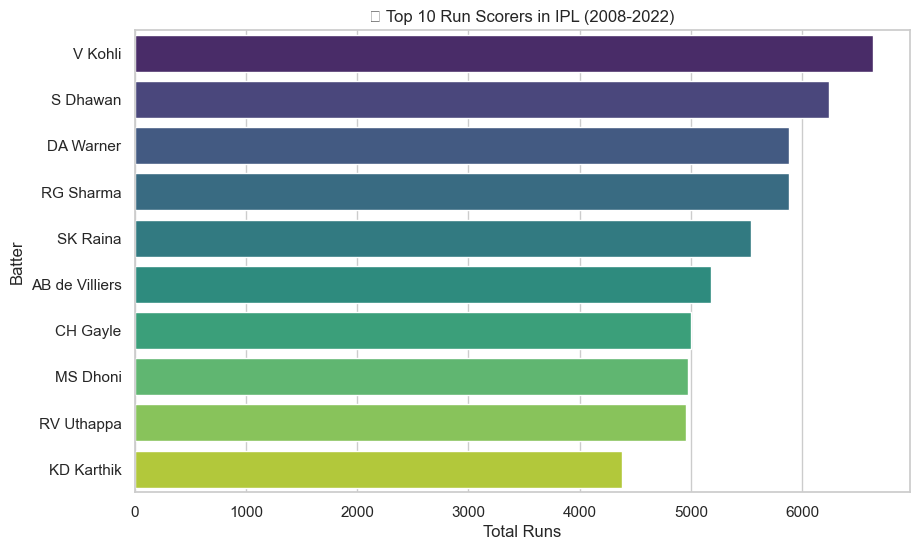

In [9]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_batters.values, y=top_batters.index, palette="viridis")
plt.title("🏏 Top 10 Run Scorers in IPL (2008-2022)")
plt.xlabel("Total Runs")
plt.ylabel("Batter")
plt.show()


In [10]:
# Top 10 Bowlers
top_bowlers = ipl_df.groupby('bowler')['isWicketDelivery'].sum().sort_values(ascending=False).head(10)
top_bowlers.head()

bowler
DJ Bravo      207
SL Malinga    188
A Mishra      175
R Ashwin      174
YS Chahal     172
Name: isWicketDelivery, dtype: int64

C:\Users\91703\AppData\Local\Temp\ipykernel_11752\1260236992.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_bowlers.values, y=top_bowlers.index, palette="coolwarm")
C:\Users\91703\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127951 (\N{CRICKET BAT AND BALL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


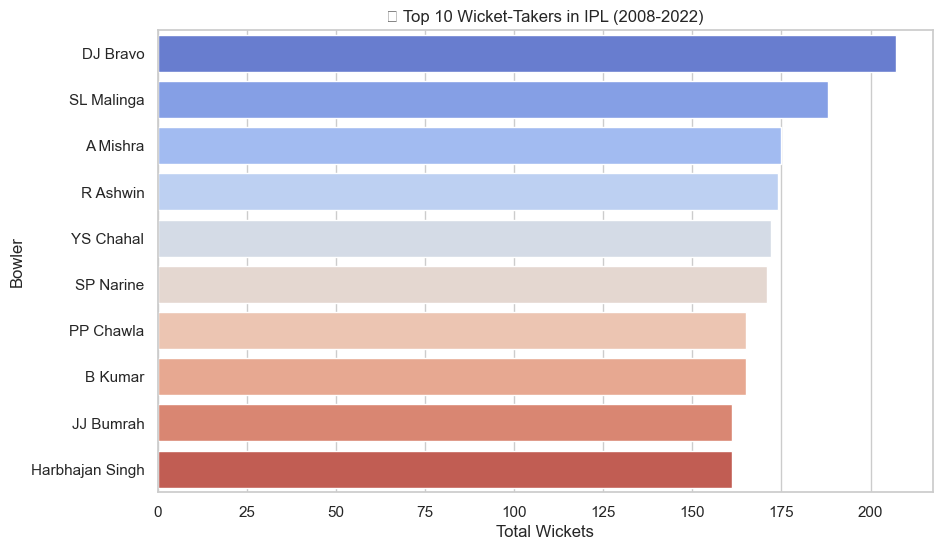

In [11]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_bowlers.values, y=top_bowlers.index, palette="coolwarm")
plt.title("🏏 Top 10 Wicket-Takers in IPL (2008-2022)")
plt.xlabel("Total Wickets")
plt.ylabel("Bowler")
plt.show()

C:\Users\91703\AppData\Local\Temp\ipykernel_11752\2495645029.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_runs.values, y=team_runs.index, palette="magma")
C:\Users\91703\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128165 (\N{COLLISION SYMBOL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


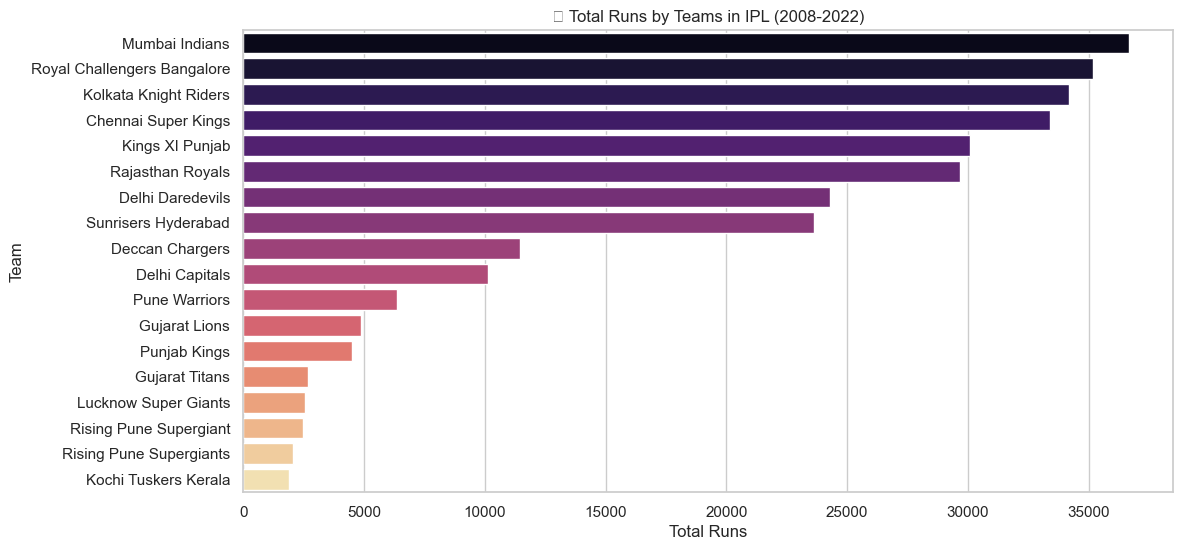

In [12]:
# Total runs by each team
team_runs = ipl_df.groupby('batting_team')['total_run'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=team_runs.values, y=team_runs.index, palette="magma")
plt.title("💥 Total Runs by Teams in IPL (2008-2022)")
plt.xlabel("Total Runs")
plt.ylabel("Team")
plt.show()


In [13]:
team_runs.head(10) # Displaying the top 10 teams with most runs

batting_team
Mumbai Indians                 36663
Royal Challengers Bangalore    35190
Kolkata Knight Riders          34201
Chennai Super Kings            33393
Kings XI Punjab                30064
Rajasthan Royals               29681
Delhi Daredevils               24296
Sunrisers Hyderabad            23643
Deccan Chargers                11463
Delhi Capitals                 10145
Name: total_run, dtype: int64

C:\Users\91703\AppData\Local\Temp\ipykernel_11752\1595860045.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_run_getters.values, y=top_run_getters.index, palette="viridis")
C:\Users\91703\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127951 (\N{CRICKET BAT AND BALL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


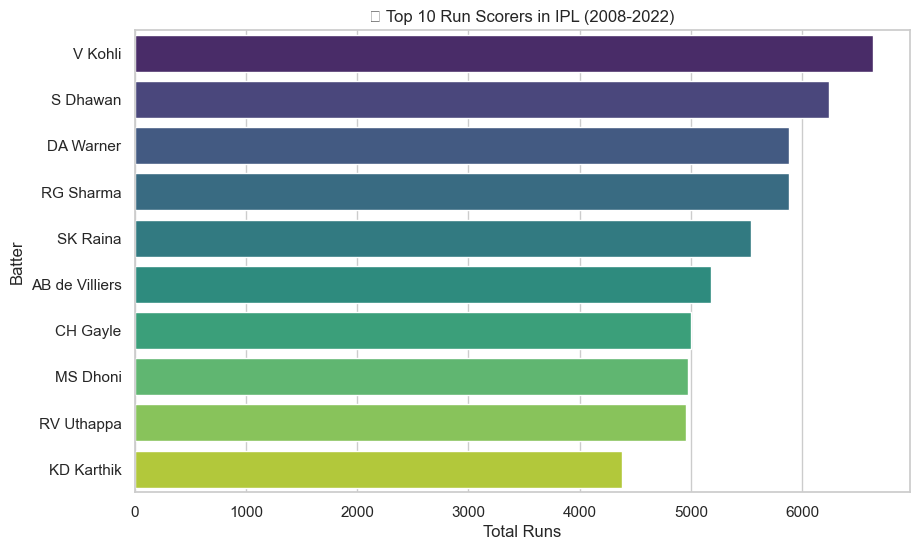

In [14]:
# Total runs by each batter
top_run_getters = ipl_df.groupby('batsman')['batsman_run'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_run_getters.values, y=top_run_getters.index, palette="viridis")
plt.title("🏏 Top 10 Run Scorers in IPL (2008-2022)")
plt.xlabel("Total Runs")
plt.ylabel("Batter")
plt.show()


C:\Users\91703\AppData\Local\Temp\ipykernel_11752\569324052.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_sixes.values, y=team_sixes.index, palette="cubehelix")
C:\Users\91703\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128165 (\N{COLLISION SYMBOL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


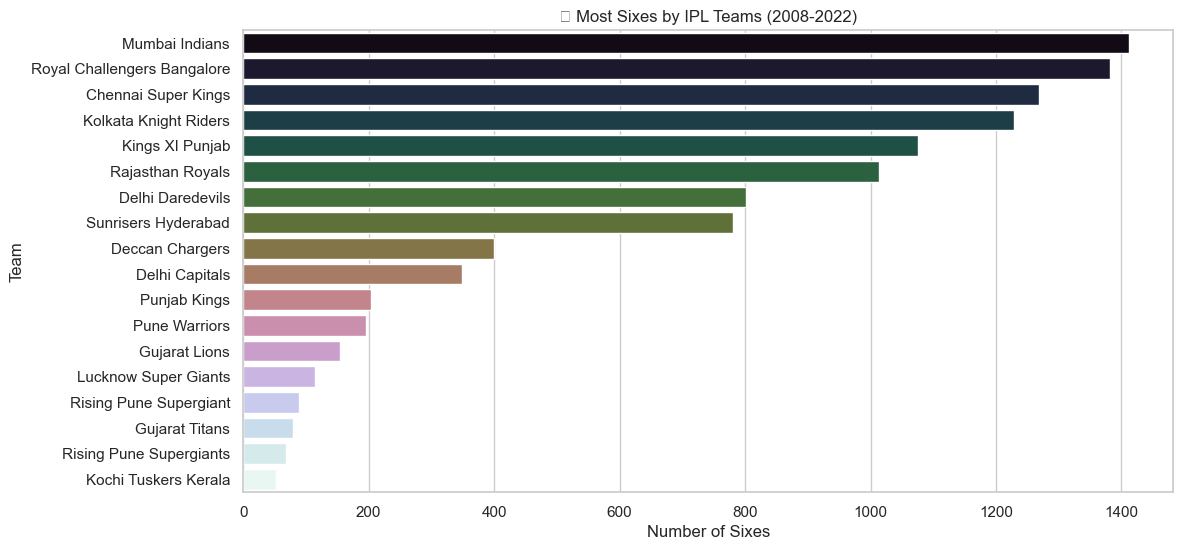

In [15]:
# Filter only sixes
sixes_by_team = ipl_df[ipl_df['batsman_run'] == 6]

# Group by BattingTeam and count
team_sixes = sixes_by_team['batting_team'].value_counts().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=team_sixes.values, y=team_sixes.index, palette="cubehelix")
plt.title("💥 Most Sixes by IPL Teams (2008-2022)")
plt.xlabel("Number of Sixes")
plt.ylabel("Team")
plt.show()


C:\Users\91703\AppData\Local\Temp\ipykernel_11752\2890559790.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_dot_bowlers.values, y=top_dot_bowlers.index, palette="coolwarm")
C:\Users\91703\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


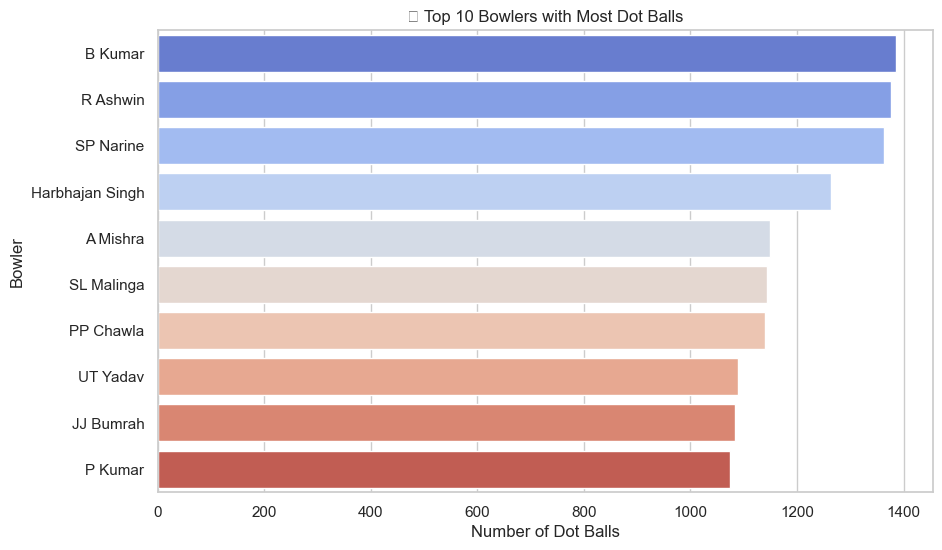

In [16]:
# Dot ball: total_run == 0 and extras_run == 0
dot_balls = ipl_df[(ipl_df['total_run'] == 0) & (ipl_df['extras_run'] == 0)]

# Count dot balls by bowler
top_dot_bowlers = dot_balls['bowler'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_dot_bowlers.values, y=top_dot_bowlers.index, palette="coolwarm")
plt.title("🎯 Top 10 Bowlers with Most Dot Balls")
plt.xlabel("Number of Dot Balls")
plt.ylabel("Bowler")
plt.show()


C:\Users\91703\AppData\Local\Temp\ipykernel_11752\876703253.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_wicket_takers.values, y=top_wicket_takers.index, palette="flare")
C:\Users\91703\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


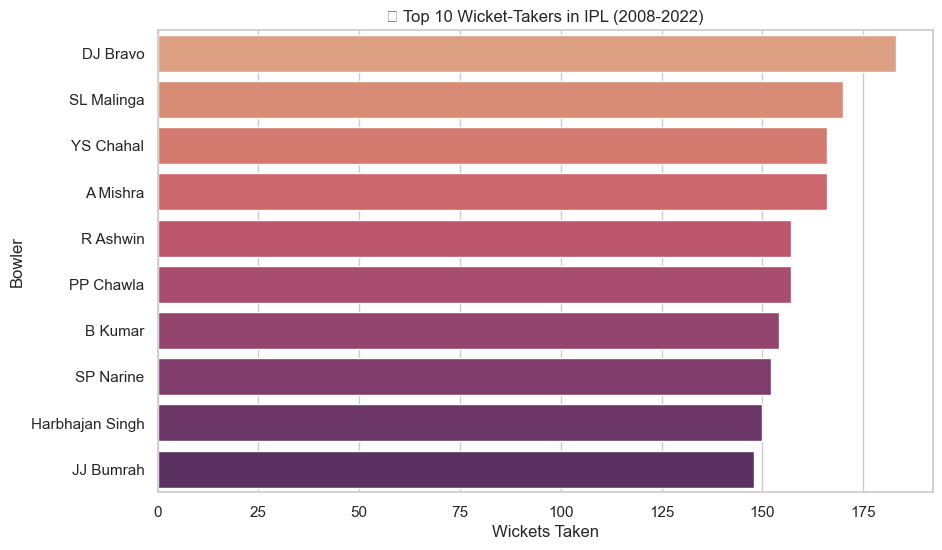

In [17]:
# Filter for deliveries where a wicket fell
wickets = ipl_df[ipl_df['isWicketDelivery'] == 1]

# Remove run-outs from wicket count
wickets = wickets[wickets['kind'] != 'run out']

# Count by bowler
top_wicket_takers = wickets['bowler'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_wicket_takers.values, y=top_wicket_takers.index, palette="flare")
plt.title("🏆 Top 10 Wicket-Takers in IPL (2008-2022)")
plt.xlabel("Wickets Taken")
plt.ylabel("Bowler")
plt.show()


In [18]:
# Group by match (ID), innings, and over
over_scores = ipl_df.groupby(['ID', 'innings', 'overs'])['total_run'].sum().reset_index()

# Filter for high-scoring overs
high_scoring_overs = over_scores[over_scores['total_run'] >= 30].sort_values(by='total_run', ascending=False)

# Display top high-scoring overs
high_scoring_overs.head(10)


,ID,innings,overs,total_run
9979,1254076,1,19,37
23052,501247,2,2,37
12128,1304060,2,15,35
32052,734047,2,5,33
20144,419139,1,12,33
24776,548327,2,12,31
59,1082592,1,19,30
6954,1216493,1,19,30
7068,1216496,1,19,30
13632,1304099,1,18,30


C:\Users\91703\AppData\Local\Temp\ipykernel_11752\2605694640.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_scores, x='batsman', y='Total_Runs', palette="rocket")


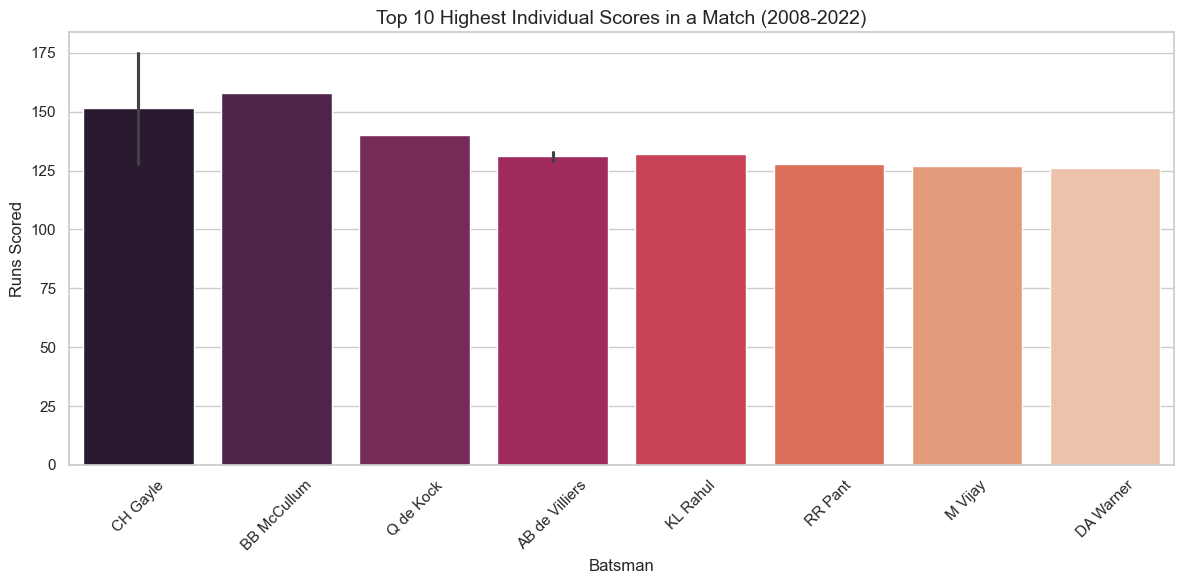

In [19]:
top_scores = (
    ipl_df.groupby(['ID', 'batsman'])['batsman_run']
    .sum()
    .reset_index()
    .rename(columns={'ID': 'Match_ID', 'batter': 'Batsman', 'batsman_run': 'Total_Runs'})
    .sort_values(by='Total_Runs', ascending=False)
    .head(10)
)

plt.figure(figsize=(12,6))

# Plot
sns.barplot(data=top_scores, x='batsman', y='Total_Runs', palette="rocket")
plt.title("Top 10 Highest Individual Scores in a Match (2008-2022)", fontsize=14)
plt.xticks(rotation=45)
plt.ylabel("Runs Scored")
plt.xlabel("Batsman")
plt.tight_layout()
plt.show()


Dashboard 


C:\Users\91703\AppData\Local\Temp\ipykernel_11752\138591406.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='batsman', y='batsman_run', data=filtered_df, palette="Set2")


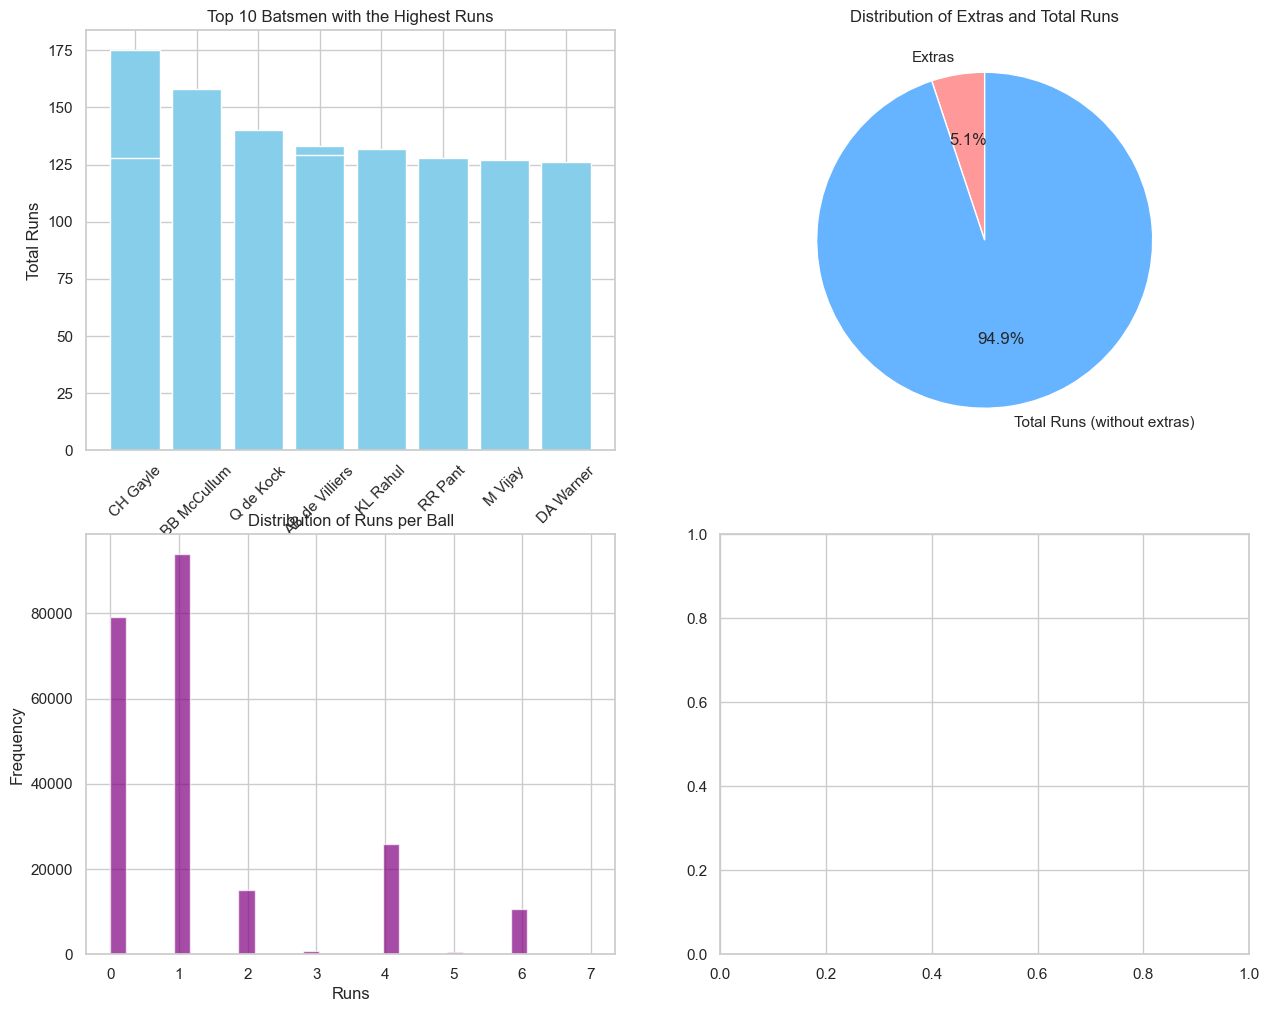

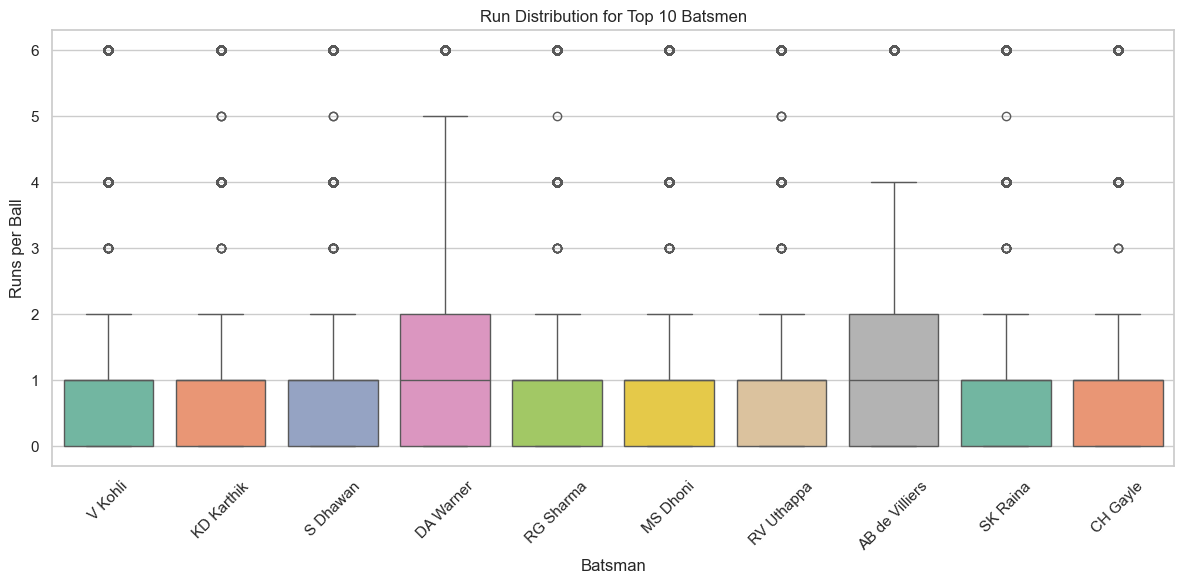

<Figure size 640x480 with 0 Axes>

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Let's assume top_scores and ipl_df are already available from previous steps

# Set up the style for the visualizations
sns.set(style="whitegrid")

# Create a 2x2 grid of plots (4 visualizations)
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# --- 1. Top 10 Batsmen with the Highest Runs ---
axs[0, 0].bar(top_scores['batsman'], top_scores['Total_Runs'], color='skyblue')
axs[0, 0].set_title('Top 10 Batsmen with the Highest Runs')
axs[0, 0].set_xlabel('Batsman')
axs[0, 0].set_ylabel('Total Runs')
axs[0, 0].tick_params(axis='x', rotation=45)

# --- 2. Pie Chart: Distribution of Extras and Total Runs ---
extras_run_sum = ipl_df['extras_run'].sum()
total_run_sum = ipl_df['total_run'].sum()
sizes = [extras_run_sum, total_run_sum - extras_run_sum]
labels = ['Extras', 'Total Runs (without extras)']
axs[0, 1].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
axs[0, 1].set_title('Distribution of Extras and Total Runs')

# --- 3. Histogram: Distribution of Runs per Ball ---
axs[1, 0].hist(ipl_df['total_run'], bins=30, color='purple', alpha=0.7)
axs[1, 0].set_title('Distribution of Runs per Ball')
axs[1, 0].set_xlabel('Runs')
axs[1, 0].set_ylabel('Frequency')

# --- 4. Box Plot: Distribution of Runs Scored by Each Batsman ---
# Step 1: Get top 10 batsmen by total runs
top_batsmen = ipl_df.groupby('batsman')['batsman_run'].sum().sort_values(ascending=False).head(10).index

# Step 2: Filter DataFrame to only those batsmen
filtered_df = ipl_df[ipl_df['batsman'].isin(top_batsmen)]

# Step 3: Plot the cleaned box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='batsman', y='batsman_run', data=filtered_df, palette="Set2")
plt.title('Run Distribution for Top 10 Batsmen')
plt.xticks(rotation=45)
plt.xlabel('Batsman')
plt.ylabel('Runs per Ball')
plt.tight_layout()
plt.show()


# Adjust layout for better presentation
plt.tight_layout()
plt.show()


In [27]:
for _, row in df.iterrows():
    cursor.execute("""
        INSERT INTO ball_by_ball (
            ID, innings, overs, ball, batsman, bowler, non_striker, extra_type,
            batsman_run, extras_run, total_run, non_boundary, isWicketDelivery,
            player_out, kind, fielders_involved, batting_team, ball_id
        ) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
    """, tuple(row))

conn.commit()
cursor.close()
conn.close()

print("✅ Data loaded into MySQL successfully!")

✅ Data loaded into MySQL successfully!


In [26]:
cursor = conn.cursor()

In [25]:
conn = mysql.connector.connect(
    host="localhost",
    user="BeingSwapnil31",
    password="Swapnil@199831",
    database="ipl_data"
)
df = pd.read_csv("../data/ipl_cleaned.csv")


In [23]:
import mysql.connector

In [22]:
df.to_csv("../data/ipl_cleaned.csv", index=False)

In [20]:
df["ball_id"] = df["overs"].astype(str) + "." + df["ball"].astype(str)


In [18]:
df.rename(columns={
    "batter": "batsman",
    "ballnumber": "ball",
    "BattingTeam": "batting_team"
}, inplace=True)

In [19]:
df.sample(5)

,ID,innings,overs,ball,batsman,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,batting_team
218690,336013,2,18,1,IK Pathan,JA Morkel,PP Chawla,NaN,6,0,6,0,0,NaN,NaN,NaN,Kings XI Punjab
94288,980977,1,15,1,AB de Villiers,Sandeep Sharma,Sachin Baby,NaN,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
199818,392236,2,18,3,RJ Harris,A Kumble,AA Bilakhia,NaN,1,0,1,0,0,NaN,NaN,NaN,Deccan Chargers
78471,1082638,2,15,4,S Dhawan,JJ Bumrah,V Shankar,NaN,2,0,2,0,0,NaN,NaN,NaN,Sunrisers Hyderabad
72032,1136575,1,9,4,RA Tripathi,TK Curran,DJM Short,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals


In [14]:
df = pd.read_csv(RAW_DATA_PATH)


In [12]:

import os

# Paths
RAW_DATA_PATH = "../data/ipl_ball_by_ball_2008_2022.csv"
CLEANED_DATA_PATH = "../data/ipl_cleaned.csv"

In [ ]:
df = pd.read_csv(RAW_DATA_PATH)

# Combine total runs
df["total_runs"] = df["runs_off_bat"] + df["extras"]

# Optional: Create a proper ball notation
df["ball_number"] = df["over"].astype(str) + "." + df["ball"].astype(str)

# Drop nulls (or you can choose to fill if needed)
df.dropna(subset=["batsman", "bowler"], inplace=True)

# Save cleaned dataset
df.to_csv(CLEANED_DATA_PATH, index=False)

print("✅ Data cleaned and saved to:", CLEANED_DATA_PATH)


In [5]:
print("\nShape of Data\n: ",df.shape)


Shape of Data
:  (225954, 17)


In [9]:
print("\nSample Rows\n: ",df.sample(5))
print("\nData Types\n: ",df.dtypes)


Sample Rows
:               ID  innings  overs  ballnumber     batter         bowler  \
225272   335984        1      1           4    T Kohli       B Geeves   
155277   548358        2      1           5   R Dravid        B Kumar   
112469   829741        1      3           5  AM Rahane     MG Johnson   
1365    1304115        2      6           4   D Brevis       MR Marsh   
213325   336037        2      7           1   PA Patel  Shahid Afridi   

         non-striker extra_type  batsman_run  extras_run  total_run  \
225272     YK Pathan        NaN            1           0          1   
155277     SR Watson        NaN            0           0          0   
112469     SR Watson        NaN            4           0          4   
1365    Ishan Kishan        NaN            0           0          0   
213325      SK Raina        NaN            1           0          1   

        non_boundary  isWicketDelivery player_out kind fielders_involved  \
225272             0                 0    

In [8]:
print("\nNull Rows in the dataset\n: ",df.isnull().sum())


Null Rows in the dataset
:  ID                        0
innings                   0
overs                     0
ballnumber                0
batter                    0
bowler                    0
non-striker               0
extra_type           213905
batsman_run               0
extras_run                0
total_run                 0
non_boundary              0
isWicketDelivery          0
player_out           214803
kind                 214803
fielders_involved    217966
BattingTeam               0
dtype: int64


In [6]:
print("\nColumns\n: ",df.columns)


Columns
:  Index(['ID', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'extra_type', 'batsman_run', 'extras_run', 'total_run',
       'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam'],
      dtype='object')


In [4]:
file_path =("../data/IPL_Ball_by_Ball_2008_2022.csv")
df=pd.read_csv(file_path)
import pandas as pd
import numpy as np
